In [1]:
# Import Libraries
import os , sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from scipy.stats import f_oneway ,ttest_ind, ttest_rel, zscore
from scipy.stats import shapiro, levene, mannwhitneyu, kruskal, friedmanchisquare

import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data 
data_path = 'Data/Full_data.csv'
data = pd.read_csv(data_path)


data.head(20)

,Subject,pre-affective,post-affective,pre-cognitive,post-cognitive,pre-connative,post-connative,pre-PEB,post-PEB,Experiment
0,Student1,4.33,4.00,3.5,4.50,4.0,4.67,3.43,4.25,Audio
1,Student2,3.33,4.33,4.0,4.00,5.0,3.67,3.00,4.25,Audio
2,Student3,2.67,4.33,3.5,3.50,4.5,4.00,3.57,3.75,Audio
3,Student4,4.00,4.00,3.5,3.75,4.5,4.00,4.43,3.75,Audio
4,Student5,3.33,4.00,4.0,3.75,3.0,4.00,3.71,3.00,Audio
5,Student6,3.00,5.00,3.0,4.25,5.0,4.67,4.43,3.75,Audio
6,Student7,4.33,4.33,4.0,4.00,4.5,5.00,3.57,4.25,Audio
7,Student8,3.67,4.00,3.0,3.50,3.5,4.00,3.43,4.00,Audio
8,Student9,4.67,4.00,3.5,5.00,3.0,4.33,4.43,4.00,Audio
9,Student10,5.00,4.67,4.0,4.50,5.0,4.33,4.29,3.75,Audio


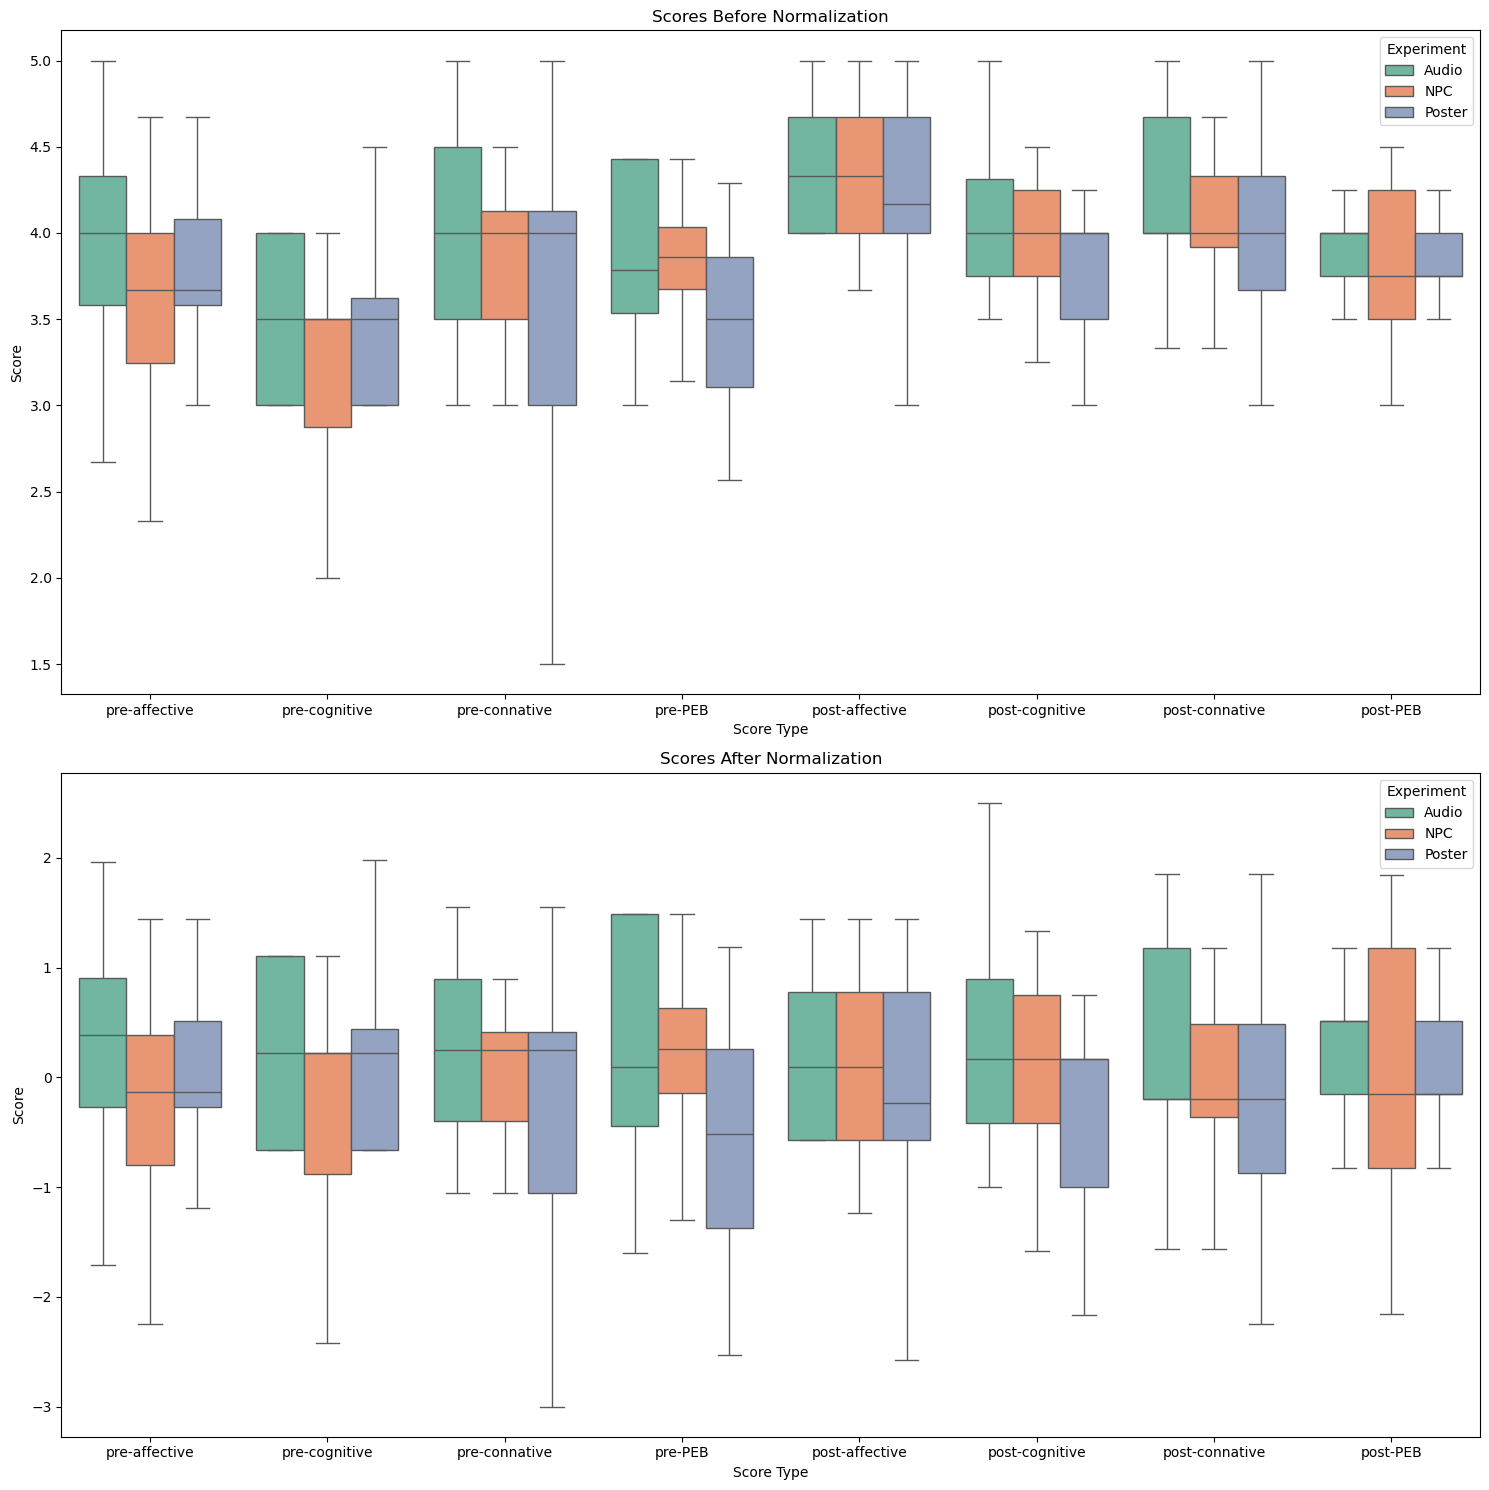

In [3]:
# Function to apply z-score normalization
def apply_zscore(df, columns):
    return df[columns].apply(zscore)

# Normalize the pre and post scores
columns_to_normalize = ['pre-affective', 'post-affective', 
                        'pre-cognitive', 'post-cognitive',
                        'pre-connative', 'post-connative', 
                        'pre-PEB', 'post-PEB']

normalized_data = apply_zscore(data, columns_to_normalize)

# Combine the original and normalized data for visualization
combined_data = data.copy()
combined_data[columns_to_normalize] = normalized_data

# Reshape the data for seaborn's boxplot
melted_data_pre = pd.melt(combined_data, 
                          id_vars=['Subject', 'Experiment'], 
                          value_vars=['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB'],
                          var_name='Score Type', 
                          value_name='Score')

melted_data_post = pd.melt(combined_data, 
                           id_vars=['Subject', 'Experiment'], 
                           value_vars=['post-affective', 'post-cognitive', 'post-connative', 'post-PEB'],
                           var_name='Score Type', 
                           value_name='Score')

# Mapping to correct score types for merged plotting
score_type_mapping = {
    'pre-affective': 'affective',
    'pre-cognitive': 'cognitive',
    'pre-connative': 'connative',
    'pre-PEB': 'PEB',
    'post-affective': 'affective',
    'post-cognitive': 'cognitive',
    'post-connative': 'connative',
    'post-PEB': 'PEB'
}

melted_data_pre['Score Type'] = melted_data_pre['Score Type'].map(score_type_mapping)
melted_data_post['Score Type'] = melted_data_post['Score Type'].map(score_type_mapping)

# Adjust Score Type to include pre/post labels for plotting
melted_data_pre['Score Type'] = 'pre-' + melted_data_pre['Score Type']
melted_data_post['Score Type'] = 'post-' + melted_data_post['Score Type']

# Merge pre and post data for combined plotting

melted_data_combined_corrected = pd.concat([melted_data_pre, melted_data_post], ignore_index=True)




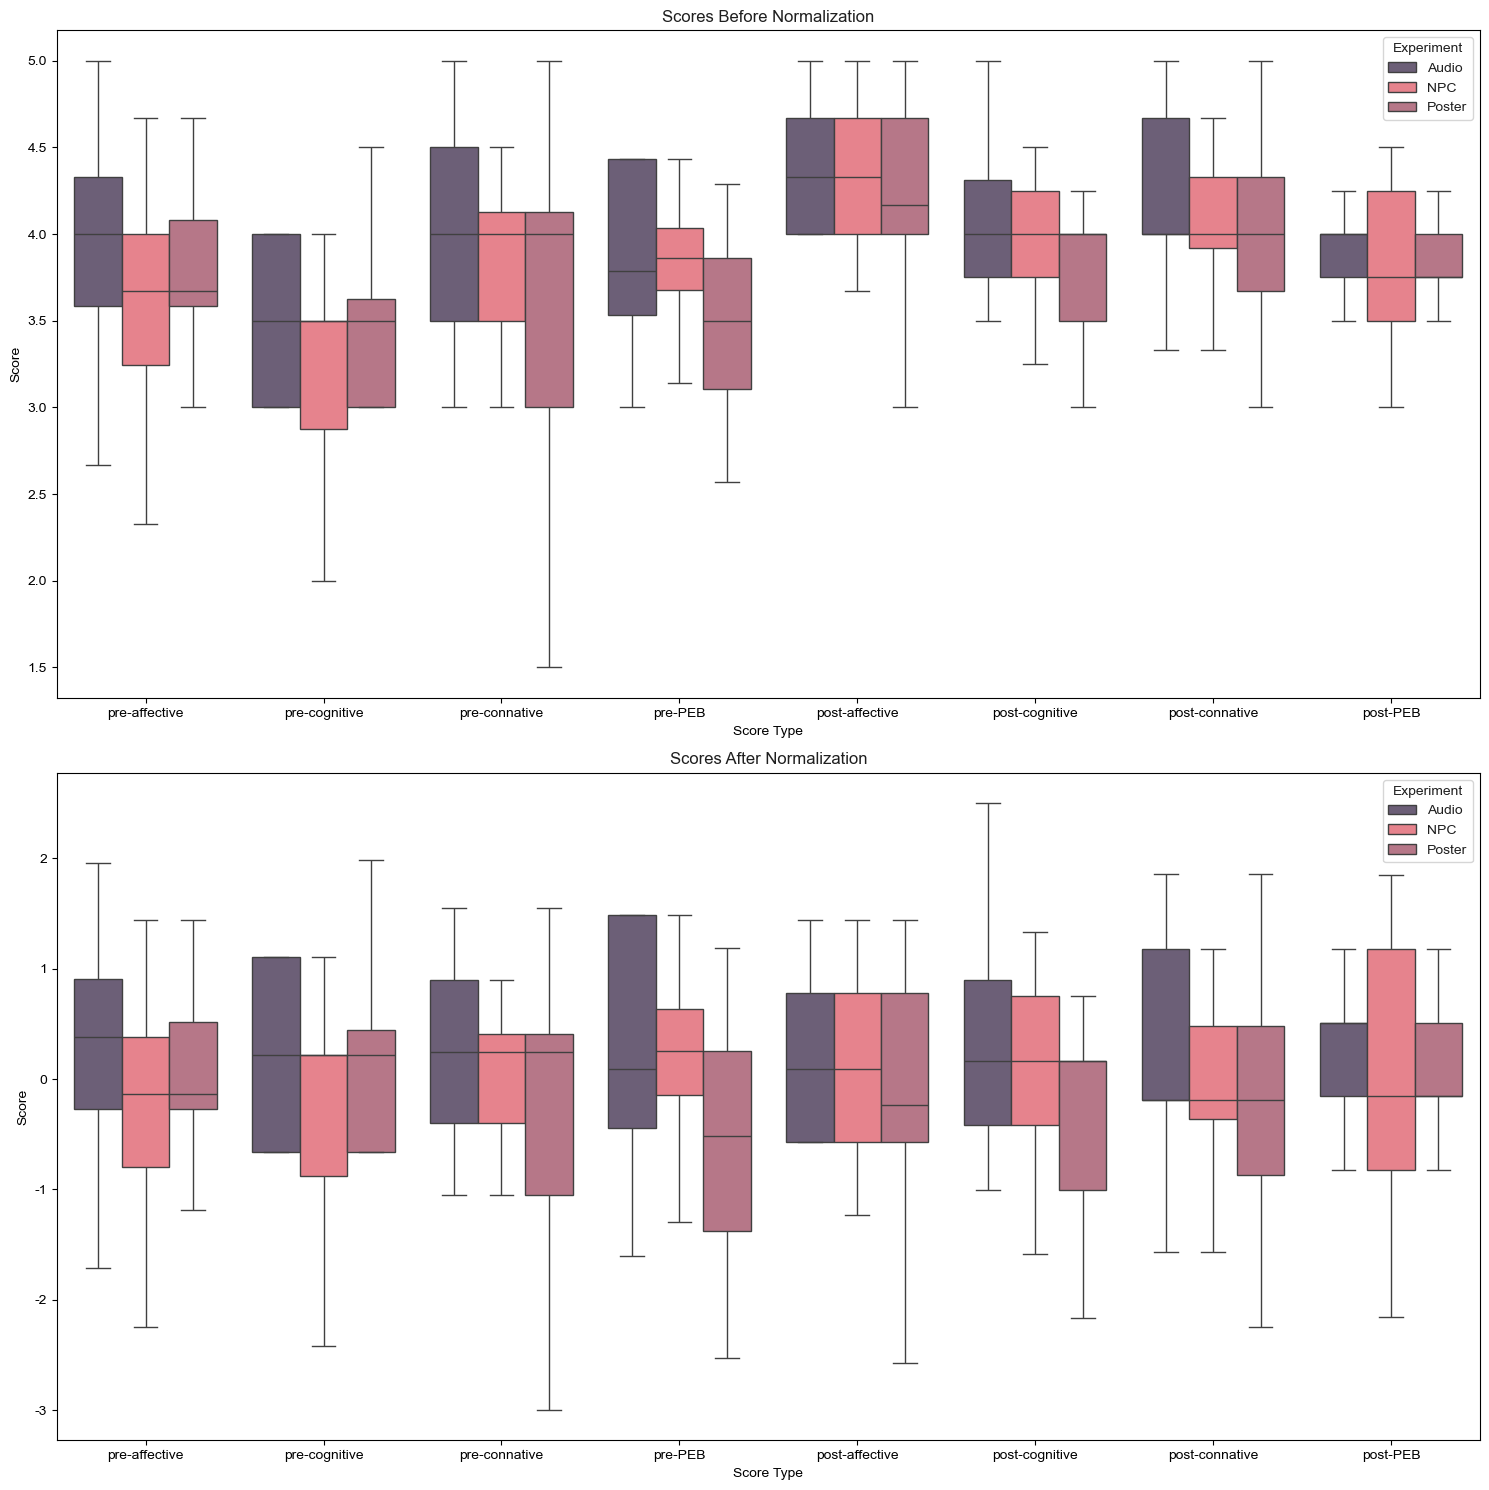

In [65]:

# Define your categories and corresponding colors
category_colors = {
    "Audio": "#6C5B7B",
    "Poster": "#C06C84",
    "NPC": "#F67280"
}

EXPERIMENTS = ['Poster', 'Audio', 'NPC']

# Assign colors to each category
COLORS = [category_colors[category] for category in EXPERIMENTS]

# Now you can continue with your colormap and normalization if needed
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=len(category_colors) - 1)
normalized_colors = cmap(norm(range(len(category_colors))))

# Plotting corrected
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Combined Plot Before Normalization (Using original data before normalization for comparison)
sns.boxplot(ax=axes[0], x='Score Type', y='Score', hue='Experiment', data=pd.melt(data, 
                          id_vars=['Subject', 'Experiment'], 
                          value_vars=['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB',
                                      'post-affective', 'post-cognitive', 'post-connative', 'post-PEB'],
                          var_name='Score Type', 
                          value_name='Score'), palette=category_colors, showfliers=False)
axes[0].set_title('Scores Before Normalization')

# Combined Plot After Normalization (Using normalized data)
sns.boxplot(ax=axes[1], x='Score Type', y='Score', hue='Experiment', data=melted_data_combined_corrected, palette=category_colors, showfliers=False)
axes[1].set_title('Scores After Normalization')

plt.tight_layout()
plt.show()

In [4]:
# Function to test normality
def test_normality(df, columns):
    normality_results = {}
    for column in columns:
        stat, p = shapiro(df[column])
        normality_results[column] = 'Normal' if p > 0.05 else 'Not Normal'
    return normality_results

# Function to test homogeneity of variances
def test_homogeneity(df, group_col, value_cols):
    homogeneity_results = {}
    for value_col in value_cols:
        stat, p = levene(*[group[value_col].dropna() for name, group in df.groupby(group_col)])
        homogeneity_results[value_col] = 'Homogeneous' if p > 0.05 else 'Not Homogeneous'
    return homogeneity_results

# Applying tests to each experimental group
normality_pre = test_normality(data, ['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB'])
normality_post = test_normality(data, ['post-affective', 'post-cognitive', 'post-connative', 'post-PEB'])

homogeneity_pre = test_homogeneity(data, 'Experiment', ['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB'])
homogeneity_post = test_homogeneity(data, 'Experiment', ['post-affective', 'post-cognitive', 'post-connative', 'post-PEB'])

normality_pre, normality_post, homogeneity_pre, homogeneity_post


({'pre-affective': 'Not Normal',
  'pre-cognitive': 'Not Normal',
  'pre-connative': 'Not Normal',
  'pre-PEB': 'Not Normal'},
 {'post-affective': 'Not Normal',
  'post-cognitive': 'Not Normal',
  'post-connative': 'Not Normal',
  'post-PEB': 'Not Normal'},
 {'pre-affective': 'Homogeneous',
  'pre-cognitive': 'Homogeneous',
  'pre-connative': 'Homogeneous',
  'pre-PEB': 'Not Homogeneous'},
 {'post-affective': 'Not Homogeneous',
  'post-cognitive': 'Homogeneous',
  'post-connative': 'Homogeneous',
  'post-PEB': 'Homogeneous'})

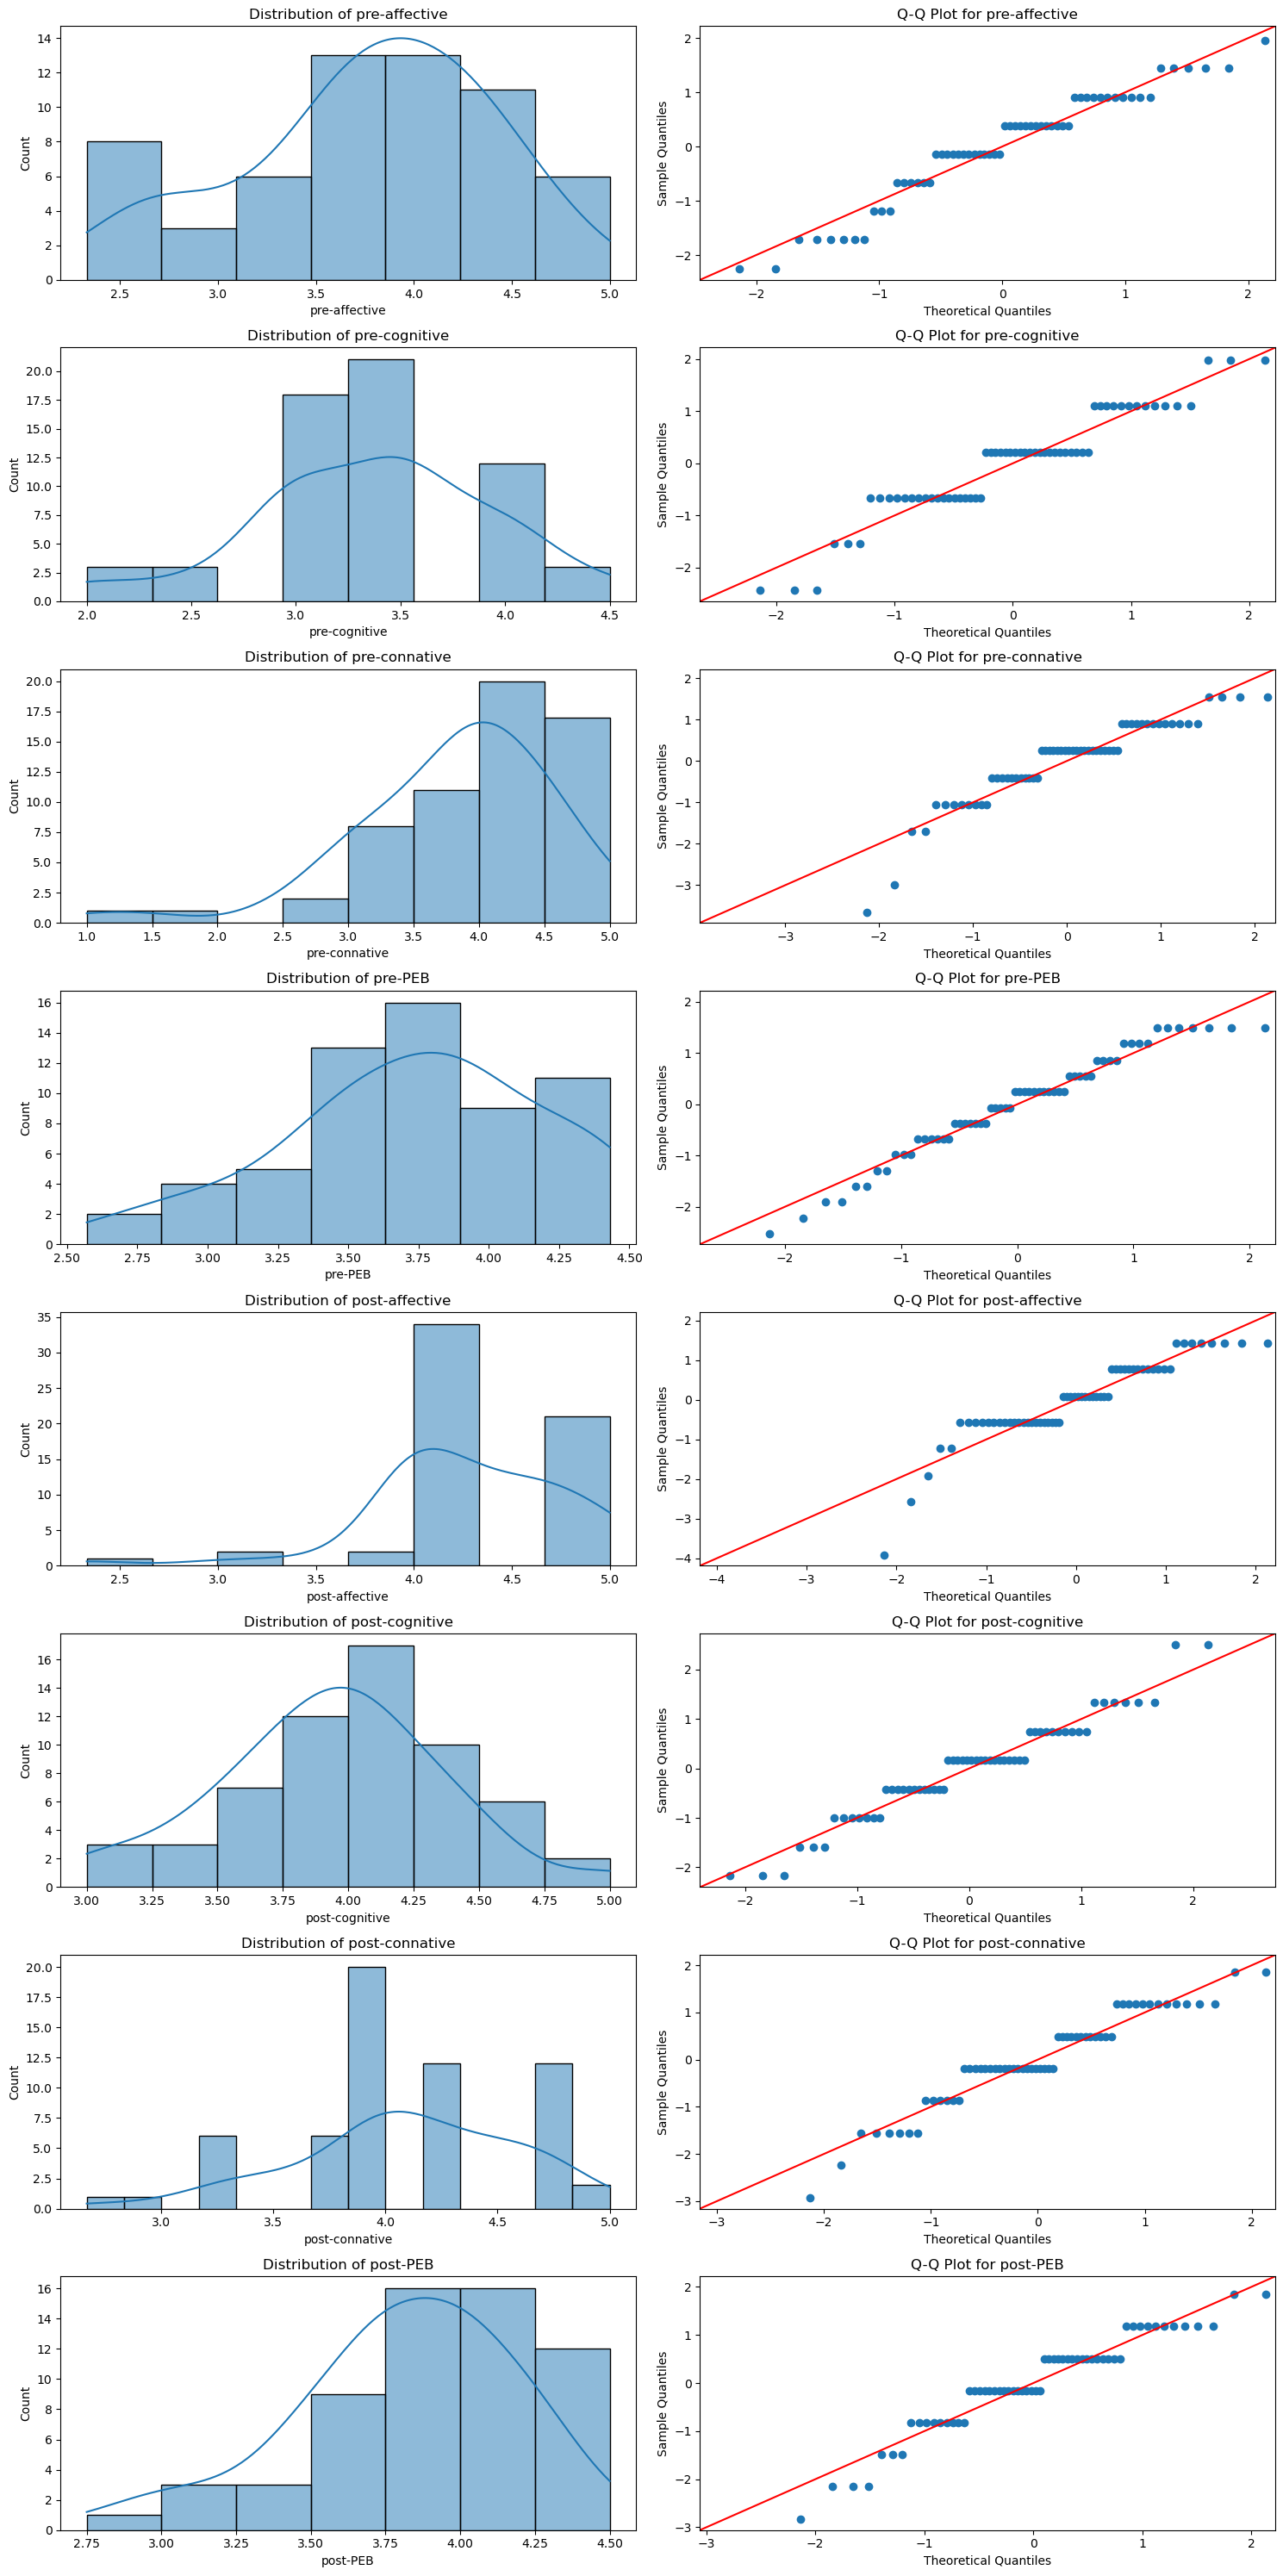

In [5]:
import statsmodels.api as sm

"""Histograms: These plots give a visual representation of the distribution of scores. Deviations from the bell-shaped curve can indicate departures from normality.
Q-Q Plots: These plots compare the quantiles of the scores against the expected quantiles from a normal distribution. 
Points falling on the red line suggest normality. Significant deviations from this line suggest non-normality"""

# Setting up the figure and axes
fig, axs = plt.subplots(8, 2, figsize=(15, 30))

# Normality Q-Q plots
for i, col in enumerate(['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB',
                         'post-affective', 'post-cognitive', 'post-connative', 'post-PEB']):
    sns.histplot(data[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribution of {col}')

    sm.qqplot(data[col], line ='45', ax=axs[i, 1], fit=True)
    axs[i, 1].set_title(f'Q-Q Plot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import kruskal

# Define a function to perform Kruskal-Wallis test across the experiments for different score types
def perform_kruskal_wallis_test(df, score_columns):
    results = {}
    for score in score_columns:
        # Extract the data for each experiment type
        scores_audio = df[df['Experiment'] == 'Audio'][score].dropna()
        scores_npc = df[df['Experiment'] == 'NPC'][score].dropna()
        scores_poster = df[df['Experiment'] == 'Poster'][score].dropna()
        
        # Perform the Kruskal-Wallis test
        stat, p = kruskal(scores_audio, scores_npc, scores_poster)
        results[score] = p
    
    return results

# Perform Kruskal-Wallis test for pre and post scores
score_columns_pre = ['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB']
score_columns_post = ['post-affective', 'post-cognitive', 'post-connative', 'post-PEB']

kruskal_results_pre = perform_kruskal_wallis_test(data, score_columns_pre)
kruskal_results_post = perform_kruskal_wallis_test(data, score_columns_post)

kruskal_results_pre, kruskal_results_post


({'pre-affective': 0.14196886049751686,
  'pre-cognitive': 0.40538322278879735,
  'pre-connative': 0.37655463775639186,
  'pre-PEB': 0.03375700490670728},
 {'post-affective': 0.5797549954311405,
  'post-cognitive': 0.1873532226058533,
  'post-connative': 0.4677354471674773,
  'post-PEB': 0.7016832330328697})

In [7]:
from scipy.stats import wilcoxon

# Function to perform Wilcoxon signed-rank test for paired samples within each experiment
def perform_wilcoxon_test(df, groups, pre_columns, post_columns):
    wilcoxon_results = {}
    for group in groups:
        group_data = df[df['Experiment'] == group]
        for pre_col, post_col in zip(pre_columns, post_columns):
            # Perform the Wilcoxon signed-rank test
            stat, p = wilcoxon(group_data[pre_col], group_data[post_col])
            wilcoxon_results[(group, pre_col, post_col)] = p
    return wilcoxon_results

# Group names and columns to compare
groups = ['Audio', 'NPC', 'Poster']
pre_columns = ['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB']
post_columns = ['post-affective', 'post-cognitive', 'post-connative', 'post-PEB']

# Perform the test
wilcoxon_test_results = perform_wilcoxon_test(data, groups, pre_columns, post_columns)
wilcoxon_test_results


{('Audio', 'pre-affective', 'post-affective'): 0.014943282004730003,
 ('Audio', 'pre-cognitive', 'post-cognitive'): 0.0010342858027663805,
 ('Audio', 'pre-connative', 'post-connative'): 0.26231050622385277,
 ('Audio', 'pre-PEB', 'post-PEB'): 0.8123550415039062,
 ('NPC', 'pre-affective', 'post-affective'): 0.0014249530063083948,
 ('NPC', 'pre-cognitive', 'post-cognitive'): 0.0013213490468723527,
 ('NPC', 'pre-connative', 'post-connative'): 0.05449400517433754,
 ('NPC', 'pre-PEB', 'post-PEB'): 0.5705966949462891,
 ('Poster', 'pre-affective', 'post-affective'): 0.009115787252508306,
 ('Poster', 'pre-cognitive', 'post-cognitive'): 0.004434704351333553,
 ('Poster', 'pre-connative', 'post-connative'): 0.11498901090475105,
 ('Poster', 'pre-PEB', 'post-PEB'): 0.029708278895255343}

#### For Audio:
- Affective: Significant change (p = 0.0149)
- Cognitive: Significant change (p = 0.0010)
- Connative: No significant change (p = 0.2623)
- PEB: No significant change (p = 0.8124)

#### For NPC:
- Affective: Significant change (p = 0.0014)
- Cognitive: Significant change (p = 0.0013)
- Connative: No significant change (p = 0.0545), although this p-value is borderline and may warrant further investigation
- PEB: No significant change (p = 0.5706)

#### For Poster:
- Affective: Significant change (p = 0.0091)
- Cognitive: Significant change (p = 0.0044)
- Connative: No significant change (p = 0.1150)
- PEB: Significant change (p = 0.0297)

These results indicate that there were significant changes in the affective and cognitive domains for all experimental conditions. 
The change in the PEB score was significant for the Poster condition but not for Audio or NPC. Connative changes were not significant in any group, with NPC being borderline. 
This suggests that all methods had an impact on affective and cognitive aspects, and the Poster method also influenced pro-environmental behaviour.

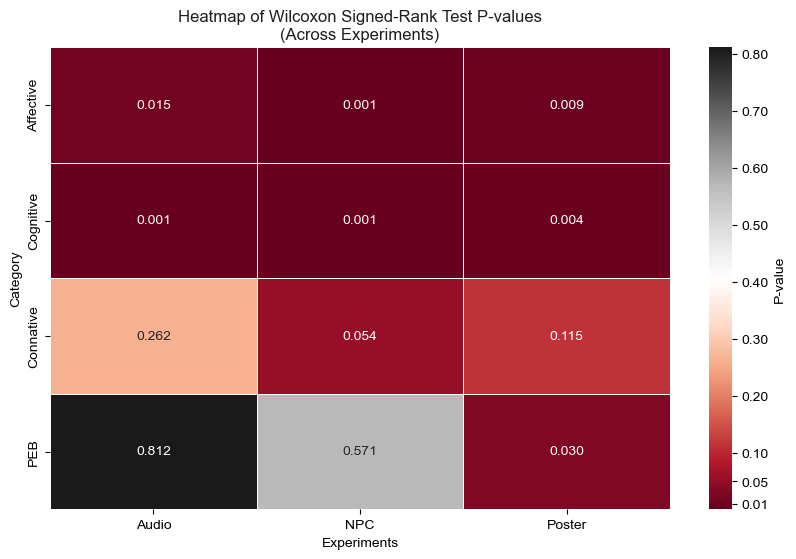

In [199]:

# Creating a DataFrame from the provided data
data = {
    'Experiment': ['Audio', 'Audio', 'Audio', 'Audio', 'NPC', 'NPC', 'NPC', 'NPC', 'Poster', 'Poster', 'Poster', 'Poster'],
    'Category': ['Affective', 'Cognitive', 'Connative', 'PEB', 'Affective', 'Cognitive', 'Connative', 'PEB', 'Affective', 'Cognitive', 'Connative', 'PEB'],
    'p-value': [0.014943282004730003, 0.0010342858027663805, 0.26231050622385277, 0.8123550415039062, 0.0014249530063083948, 0.0013213490468723527, 0.05449400517433754, 0.5705966949462891, 0.009115787252508306, 0.004434704351333553, 0.11498901090475105, 0.029708278895255343]
}

df = pd.DataFrame(data)

# Creating a pivot table for the heatmap
pivot_table = df.pivot(index='Category', columns='Experiment', values='p-value')

# Creating the heatmap
plt.figure(figsize=(10, 6))

# Create custo, colorbar
cbar_kws = {
    'label': 'P-value',
    'ticks': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'orientation': 'vertical'
}

sns.heatmap(pivot_table, annot=True, cmap=sns.color_palette(palette='RdGy', as_cmap=True), 
            linewidths=.5, fmt=".3f", cbar_kws=cbar_kws)
plt.title('Heatmap of Wilcoxon Signed-Rank Test Pp-values\n(Across Experiments)')
plt.xlabel('Experiments')
plt.ylabel('Category')


plt.show()


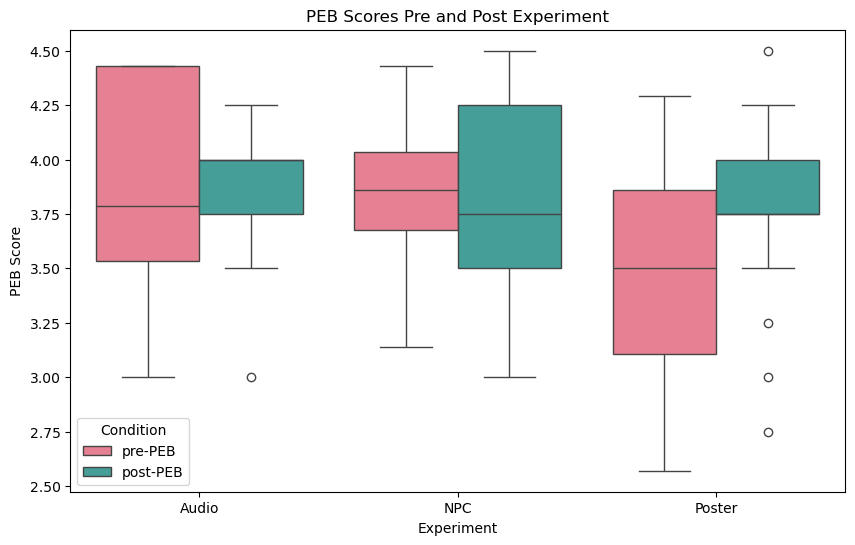

In [8]:
# We will create a plot for the PEB scores showing pre and post comparisons with indication of statistical significance

# Extract PEB scores for visualization
peb_data = data[['Experiment', 'pre-PEB', 'post-PEB']]

# Melt the data for seaborn's boxplot
peb_melted = pd.melt(peb_data, id_vars=['Experiment'], 
                     value_vars=['pre-PEB', 'post-PEB'],
                     var_name='Condition', value_name='PEB Score')

# Define a custom function to annotate the plot with statistical significance
def annotate_significance(ax, p_values, group_coords, height_start=0.1, height_step=0.05):
    y, h, col = height_start, height_step, 'k'
    for p_value, (x1, x2) in zip(p_values, group_coords):
        significance = "*" if p_value < 0.05 else "ns"
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        ax.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=col, fontsize=12)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Experiment', y='PEB Score', hue='Condition', data=peb_melted, palette='husl')

# Annotating statistical significance
p_values = [wilcoxon_test_results[('Audio', 'pre-PEB', 'post-PEB')],
            wilcoxon_test_results[('NPC', 'pre-PEB', 'post-PEB')],
            wilcoxon_test_results[('Poster', 'pre-PEB', 'post-PEB')]]
#annotate_significance(ax, p_values, [(-0.5, 1.5), (2.5, 3.5), (4.5, 5.5)])

plt.title('PEB Scores Pre and Post Experiment')
plt.legend(title='Condition')
plt.show()


In [9]:
# Calculate change scores for PEB
data['PEB_change'] = data['post-PEB'] - data['pre-PEB']

# Perform Kruskal-Wallis test on the change scores across the different experiment groups
stat, p_change_score = kruskal(data[data['Experiment'] == 'Audio']['PEB_change'],
                               data[data['Experiment'] == 'NPC']['PEB_change'],
                               data[data['Experiment'] == 'Poster']['PEB_change'])

stat, p_change_score


(4.172632003785467, 0.12414363935448332)

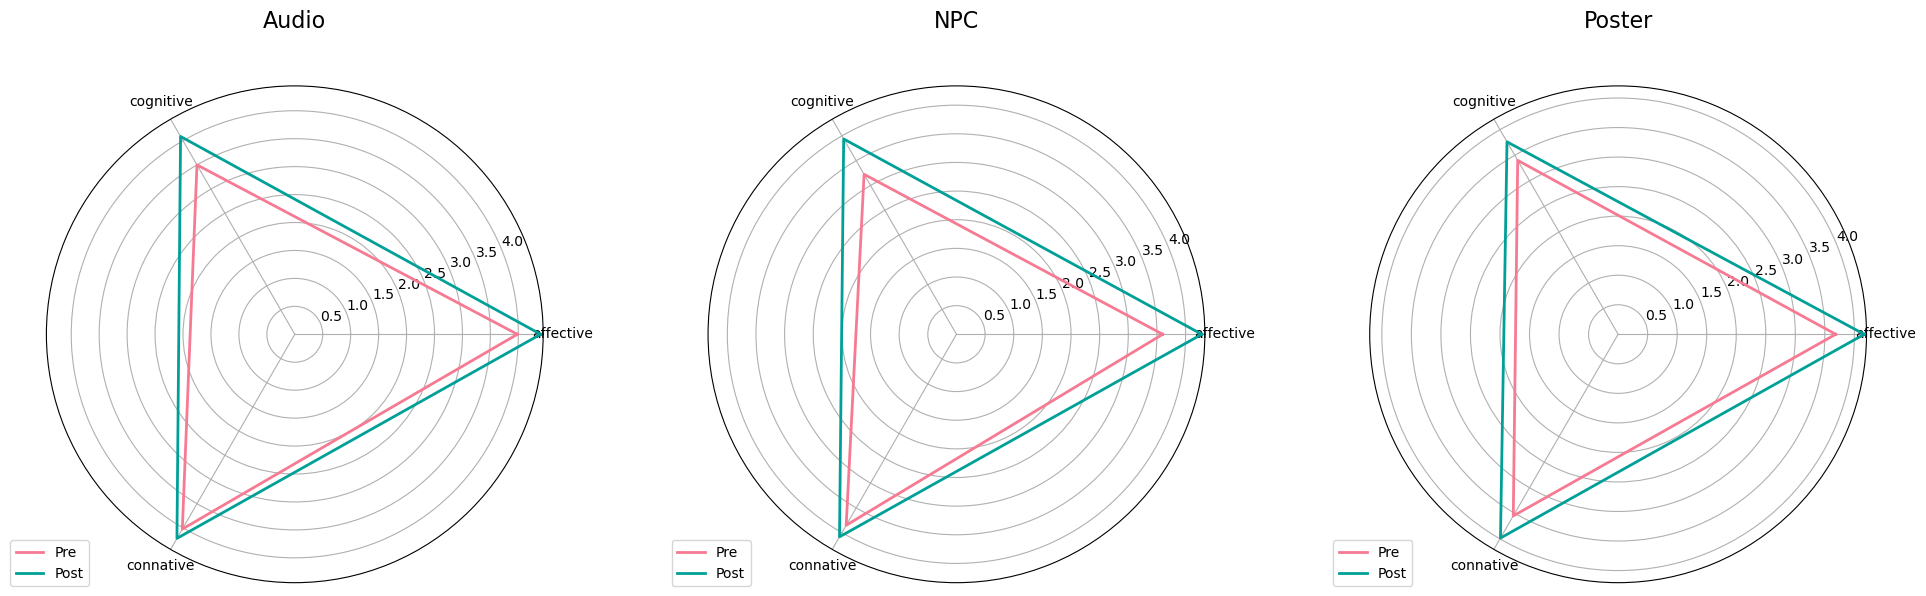

In [10]:
# Define the figure and subplots for the spider charts
fig, axarr = plt.subplots(1, 3, figsize=(20, 6), subplot_kw=dict(polar=True))

# Set the domain names and the count (which defines the chart's axes)
domains = ['affective', 'cognitive', 'connative']
num_vars = len(domains)

# Compute the angle each axis will be on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Function to add a plot to the radar chart
def add_to_spider(ax, angles, values, color, label):
    ax.plot(angles, values, color=color, linewidth=2, label=label)
    #ax.fill(angles, values, color=color, alpha=0.25)

# Loop over the experiments to create a chart for each
for idx, (experiment, group_df) in enumerate(data.groupby('Experiment')):
    ax = axarr[idx]

    # Compute means for pre and post
    means_pre = group_df[['pre-' + domain for domain in domains]].mean().values.tolist()
    means_post = group_df[['post-' + domain for domain in domains]].mean().values.tolist()
    
    # Complete the loop
    means_pre += means_pre[:1]
    means_post += means_post[:1]

    # Add to the chart
    add_to_spider(ax, angles, means_pre, '#F67A92', 'Pre')  # Pre color
    add_to_spider(ax, angles, means_post, '#00A098', 'Post')  # Post color

    # Set domain names as labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(domains)

    # Set experiment name as title
    ax.set_title(experiment, size=16, color='black', y=1.1)

    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Define the figure and subplots for the spider charts
fig, axarr = plt.subplots(1, 3, figsize=(20, 6), subplot_kw=dict(polar=True))

# Set the domain names and the count (which defines the chart's axes)
experiments = ['Audio', 'NPC', 'Poster']
num_vars = len(domains)

# Compute the angle each axis will be on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Function to add a plot to the radar chart
def add_to_spider(ax, angles, values, color, label):
    ax.plot(angles, values, color=color, linewidth=2, label=label)
    #ax.fill(angles, values, color=color, alpha=0.25)

# Loop over the experiments to create a chart for each
for idx, (experiment, group_df) in enumerate(data.groupby('Experiment')):
    ax = axarr[idx]

    # Compute means for pre and post
    means_pre = group_df[['pre-' + experiment for experiment in experiments]].mean().values.tolist()
    means_post = group_df[['post-' + experiment for experiment in experiments]].mean().values.tolist()
    
    # Complete the loop
    means_pre += means_pre[:1]
    means_post += means_post[:1]

    # Add to the chart
    add_to_spider(ax, angles, means_pre, '#F67A92', 'Pre')  # Pre color
    add_to_spider(ax, angles, means_post, '#00A098', 'Post')  # Post color

    # Set domain names as labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(domains)

    # Set experiment name as title
    ax.set_title(experiment, size=16, color='black', y=1.1)

    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
# # To replicate the circular barplot seen in the provided example, we will first create a DataFrame with the means of pre and post scores for the Audio experiment.
# audio_data = data[data['Experiment'] == 'Audio']


# # Calculate the mean of the pre and post scores for the 'Audio' experiment only.
# audio_means_pre = audio_data.filter(like='pre-').mean().reset_index()
# audio_means_post = audio_data.filter(like='post-').mean().reset_index()

# # Create a DataFrame from the means
# audio_means = pd.DataFrame({
#     'Category': ['Affective', 'Cognitive', 'Connative', 'PEB'],
#     'Pre': audio_means_pre[0].values,
#     'Post': audio_means_post[0].values
# })

# # Number of bars, which is the number of categories times two for pre and post
# num_vars = len(audio_means['Category'])

# # Compute the angle each bar is centered on:
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# # The plot is made in a circular (polar) coordinate system, so we need to close the loop
# angles += angles[:1]

# # Initialise the plot
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# # Draw one bar per category for pre scores
# for angle, height in zip(angles, audio_means['Pre']):
#     ax.bar(angle, height, width=0.4, color='blue', edgecolor='white')

# # Draw one bar per category for post scores, with an offset of 0.4 in the angle to avoid overlap
# for angle, height in zip(angles, audio_means['Post']):
#     ax.bar(angle + 0.5, height, width=0.4, color='red', edgecolor='white')

# # Set the category labels
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(audio_means['Category'])
# #Increase the font size and move away from the plot
# ax.tick_params(labelsize=15, pad=15)

# # Set the title of the plot
# plt.title('Circular Barplot for Audio Experiment', size=20, color='black', y=1.1)

# # Show the plot
# plt.show()


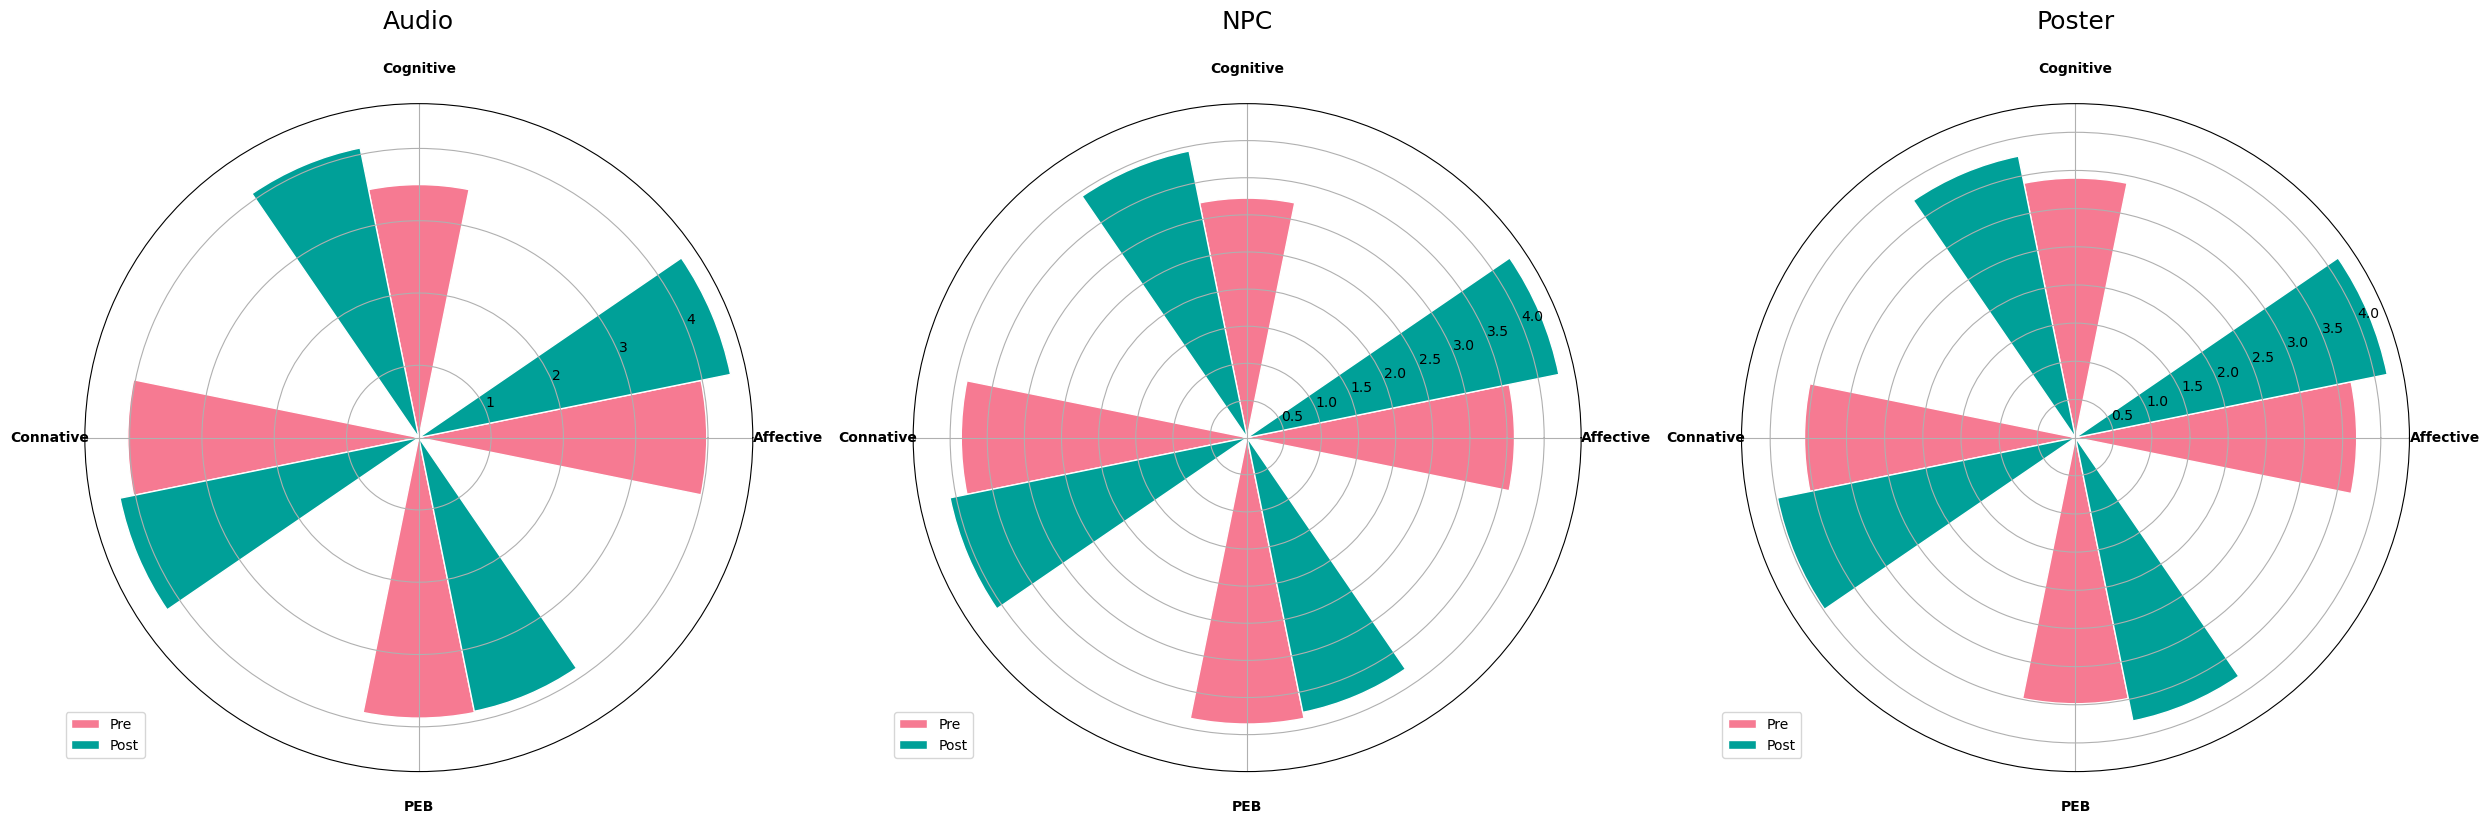

In [12]:
# Set up the color palette and experiment names

experiment_names = data['Experiment'].unique()

# Set up the figure and axes for the three subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 10), subplot_kw=dict(polar=True))

# Calculate mean scores for pre and post for each experiment
for ax, experiment in zip(axes, experiment_names):
    # Filter for the specific experiment
    exp_data = data[data['Experiment'] == experiment]

    # Calculate the means for pre and post
    means_pre = exp_data.filter(like='pre-').mean()
    means_post = exp_data.filter(like='post-').mean()

    # Create a DataFrame from the means
    experiment_means = pd.DataFrame({
        'Domain': ['Affective', 'Cognitive', 'Connative', 'PEB'],
        'Pre': means_pre.values,
        'Post': means_post.values
    })

    # Number of bars, which is the number of categories times two for pre and post
    num_vars = len(experiment_means['Domain'])

    # Sort the DataFrame by the 'Domain' column
    experiment_means = experiment_means.sort_values(by='Domain')

    # Compute the angle each bar is centered on:
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    # Draw one bar per category for pre scores
    ax.bar(angles[:-1], experiment_means['Pre'], width=0.4, color='#F67A92', edgecolor='white', label='Pre')

    # Draw one bar per category for post scores but offest by 0.4 in the angle
    ax.bar([angle + 0.4 for angle in angles[:-1]], experiment_means['Post'], width=0.4, color='#00A098', edgecolor='white', label='Post')
    

    # Set the category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(experiment_means['Domain'], fontweight='bold')
    ax.tick_params(labelsize=10, pad=15)

    # Set the experiment name as the title
    ax.set_title(experiment , size=18, color='black', y=1.1)

    # Add a legend at a specific location
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the plot
plt.tight_layout()
plt.show()



In [48]:
# make a new dataframe that groups the data by experiment and calculates the mean of each score type
#copy data without the subject column
new_data = data.drop(columns='Subject')
grouped_data = new_data.groupby('Experiment').mean().reset_index()
grouped_data
# new column pre -post for each score type
grouped_data['Affective'] = grouped_data['post-affective'] - grouped_data['pre-affective']
grouped_data['Cognitive'] = grouped_data['post-cognitive'] - grouped_data['pre-cognitive']
grouped_data['Connative'] = grouped_data['post-connative'] - grouped_data['pre-connative']
grouped_data['PEB'] = grouped_data['post-PEB'] - grouped_data['pre-PEB']

# drop the pre and post columns
grouped_data = grouped_data.drop(columns=['pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB', 'post-affective', 'post-cognitive', 'post-connative', 'post-PEB', 'PEB_change'])
print(grouped_data)

  Experiment  Affective  Cognitive  Connative    PEB
0      Audio     0.4165     0.5875     0.1920 -0.017
1        NPC     0.6830     0.7125     0.2330 -0.082
2     Poster     0.4830     0.3625     0.4335  0.301


In [49]:
# Basic Radar plot

# add scaling factor for visualisation
scaling_factor = 10
# Bars are sorted with the highest value at the PeB_ch
df_sorted = grouped_data.sort_values(by='PEB', ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Peb_change values
PEB_CHANGE = abs(df_sorted['PEB']).values * scaling_factor

# Experiment Labels
EXPERIMENTS = df_sorted['Experiment'].values 
# Affective values
AFFECTIVE_CHANGE = df_sorted['Affective'].values * scaling_factor

# Cognitive values
COGNITIVE_CHANGE = df_sorted['Cognitive'].values * scaling_factor

# Connative values
CONNATIVE_CHANGE = df_sorted['Connative'].values * scaling_factor


In [200]:
print(df_sorted)

  Experiment  Affective  Cognitive  Connative    PEB
2     Poster     0.4830     0.3625     0.4335  0.301
0      Audio     0.4165     0.5875     0.1920 -0.017
1        NPC     0.6830     0.7125     0.2330 -0.082


In [166]:
CHANGE_SCORE =np.array(['PEB_CHANGE', 'AFFECTIVE_CHANGE', 'COGNITIVE_CHANGE', 'CONNATIVE_CHANGE'])
CHANGE_SCORE

array(['PEB_CHANGE', 'AFFECTIVE_CHANGE', 'COGNITIVE_CHANGE',
       'CONNATIVE_CHANGE'], dtype='<U16')

In [60]:
EXPERIMENTS

array(['Poster', 'Audio', 'NPC'], dtype=object)

In [169]:
GREY12 = "#1f1f1f"
plt.rcParams.update({"font.family": "Arial"})
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False)

# Define your categories and corresponding colors
category_colors = {
    "PEB_CHANGE": "#721121",
    "AFFECTIVE_CHANGE": "#A5402D",
    "COGNITIVE_CHANGE": "#F15156",
    "CONNATIVE_CHANGE": "#FFC07F"
}

# Assuming EXPERIMENTS is a list of categories
# Assign colors to each category
COLORS = [category_colors[category] for category in CHANGE_SCORE]

# Now you can continue with your colormap and normalization if needed
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=len(category_colors) - 1)
normalized_colors = cmap(norm(range(len(category_colors))))

In [170]:
ANGLES -0.7 

array([-0.65      ,  1.41106177,  3.47212354])

In [171]:
ANGLES2 = np.linspace(0.05, 2 * np.pi - 0.03, len(df_sorted), endpoint=False)
ANGLES2


array([0.05      , 2.11772844, 4.18545687])

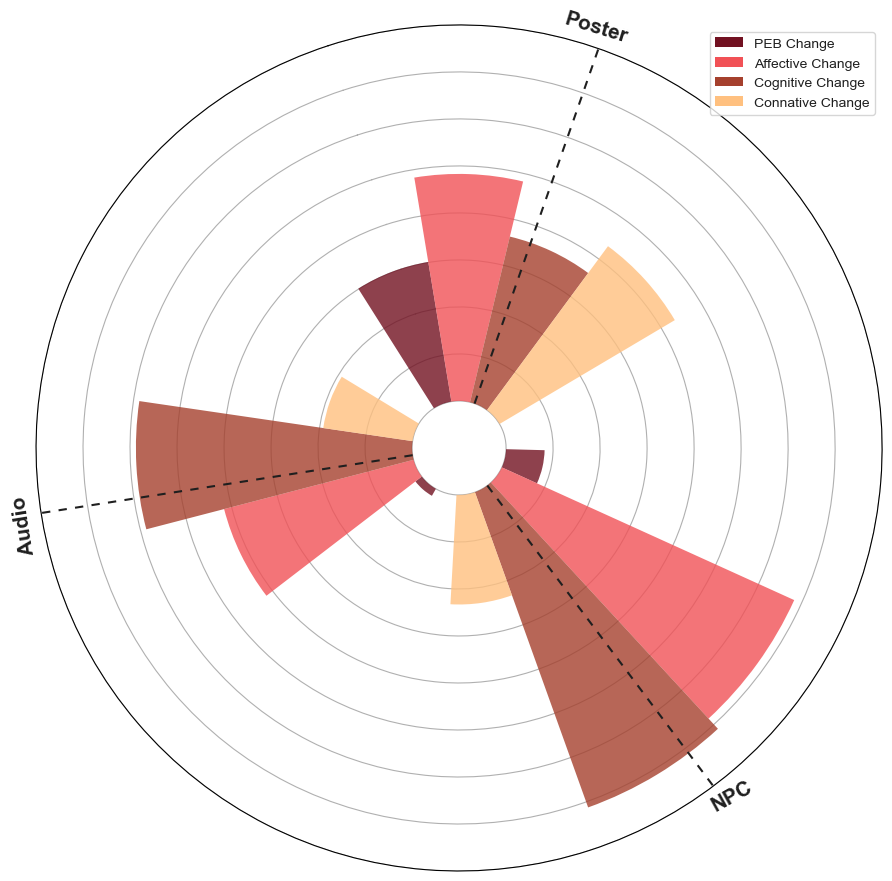

In [179]:
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1, 8)  # Adjusted ylim for PEB values

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, PEB_CHANGE, color='#721121', alpha=0.8, width=0.4, zorder=10)
ax.bar(ANGLES - 0.4, AFFECTIVE_CHANGE, color='#F15156', alpha=0.8, width=0.4, zorder=11)
ax.bar(ANGLES - 0.8, COGNITIVE_CHANGE, color='#A5402D', alpha=0.8, width=0.4, zorder=12)
ax.bar(ANGLES - 1.2, CONNATIVE_CHANGE, color='#FFC07F', alpha=0.8, width=0.4, zorder=13)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES - 0.7, 0, 5000, color=GREY12, ls=(0, (4, 4)), zorder=14)


# Add labels for the regions -------------------------------------

ax.set_xticks(ANGLES2)
ax.set_xticklabels('', color="#1f1f1f", fontsize=12, fontweight="bold")

# Add a title
#ax.set_title("Change in Scores by Experiment", color=GREY12, fontsize=16, fontweight="bold", pad=20)

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])


# Add text to explain for each experiment

ax.text(ANGLES[0]+ 37.02, 8.400, "Poster", rotation=-17, 
        ha="center", va="center", fontweight="bold", size=15, zorder=15)

ax.text(ANGLES[2]+ 37.02, 8.400, "NPC", rotation=29, 
        ha="center", va="center", fontweight="bold", size=15, zorder=15)


ax.text(ANGLES[1]+ 37.02, 8.400, "Audio", rotation=99, 
        ha="center", va="center", fontweight="bold", size=15, zorder=15)

# Add legend
# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#721121', label='PEB Change'),
                   Patch(facecolor='#F15156', label='Affective Change'),
                   Patch(facecolor='#A5402D', label='Cognitive Change'),
                   Patch(facecolor='#FFC07F', label='Connative Change')]
ax.legend(handles=legend_elements)


plt.tight_layout()
plt.show()
